In [1]:
import pandas as pd
%matplotlib notebook
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file
from bokeh.charts import Bar, output_file, show
import bokeh.plotting as bplt
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import Label, Title
import itertools  
from bokeh.layouts import gridplot,row,column

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from bokeh.io import output_notebook
plt.style.use('ggplot')
output_notebook()

Loading BokehJS ...

In [2]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'

def plot_producer(producer_dir,producer_filename,p_number,fig_count,txt):
    
    rates =pd.read_csv(directory + producer_dir + producer_filename)
    x_values = rates['Num_Messages'].tolist()
    y_values = rates['KB/sec'].tolist()
    
    f = plt.figure()
    plt.xlim(0,12500)
    plt.plot(x_values,y_values)
    plt.ylabel('KB/s')
    plt.xlabel('Msg number')
    plt.title("Producer " + str(p_number)+ "  throughput")
    text = 'Figure ' + str(fig_count) + ' : ' + txt
    f.text(.20, .02, text, ha='center')
    
    return (x_values,y_values)

## Function for reading producer's data and then plotting  it's data
#example:
# a = plot_producer('5k-4-1-1-20170912-222705/producers/producer_2/','stdout-20170912-222716.csv',3,25)

In [3]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
def plot_scheduling_and_Total_Delay(spark_metrics_dir,fig_count):
    
    metrics = pd.read_csv(directory + spark_metrics_dir ,skipinitialspace=True)
    scheduling_delay = metrics['SchedulingDelay'].tolist()    # TODO: milisec to sec
    TotalDelay = metrics['TotalDelay'].tolist()
    x_values = range(0,metrics['SchedulingDelay'].count())
    # create a new plot with a title and axis labels
    p = figure(title="Figure " + str(fig_count) + ": Spark Scheduling delay", x_axis_label='miniBatch Number', y_axis_label='Delay in milisec')
    # add a line renderer with legend and line thickness
    p.line(x_values, scheduling_delay, legend="Scheduling Delay", line_width=2,line_color="red")
    p.line(x_values,TotalDelay,legend="Total Delay", line_width=2)
    #throughput = (TotalDelay - scheduling_delay)/metrics['NumberRecords']
    bplt.show(p)
    return (x_values,scheduling_delay)



In [4]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'

def plot_throughput_per_mini_batch(spark_metrics_dir,fig_count):
    
    metrics = pd.read_csv(directory + spark_metrics_dir ,skipinitialspace=True)
    scheduling_delay = metrics['SchedulingDelay']
    TotalDelay = metrics['TotalDelay']
    x_values = range(0,scheduling_delay.count())    
    throughput = 60*metrics['NumberRecords']/(TotalDelay - scheduling_delay)      # check That
    # create a new plot with a title and axis labels
    p = figure(title="Figure " + str(fig_count) + " : Spark throughput/mini batch  - batch=60sec", x_axis_label='miniBatch Number', y_axis_label='records/batch')

    # add a line renderer with legend and line thickness
    p.line(x_values, throughput.tolist(), legend="Throughput", line_width=2,line_color="green")

    # show the results
    bplt.show(p)
    return  (x_values,throughput.tolist())

In [5]:
#throughput = lastReceivedBatch_records/ (lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime) <br>
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
def plot_spark_throughput_per_timeline(spark_app_dir,spark_app, shift_time,fig_count):
    spark_app = directory + spark_app_dir + spark_app
    lastReceivedBatch_processingEndTime_dir = spark_app +'.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
    lastReceivedBatch_processingStartTime_dir = spark_app + '.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
    lastReceivedBatch_records_dir = spark_app + '.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

    lastReceivedBatch_processingEndTime  = pd.read_csv(lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
    lastReceivedBatch_processingStartTime = pd.read_csv(lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
    lastReceivedBatch_records = pd.read_csv(lastReceivedBatch_records_dir,skipinitialspace=True)
    # throughput  - check the 1000
    throughput = 1000*lastReceivedBatch_records/(lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)
    throughput = throughput['value']
    throughput = throughput.tolist()
    
    for i in xrange(len(throughput)):
        if throughput[i]<0:
            throughput[i]=0    
            
    x_values = lastReceivedBatch_records
    x_values = x_values['t']
    x_values = x_values.tolist()

    for i in xrange(len(x_values)):
        x_values[i] = x_values[i] - shift_time
        
    p = figure(title="Figure "+ str(fig_count) + " Spark throughput per timeline", x_axis_label='Time ( in sec)', y_axis_label='Throughput (in Records/secs)')

    # add a line renderer with legend and line thickness
    p.circle(x_values, throughput, legend="Scheduling Delay", line_width=2)
    
    # show the results
    bplt.show(p)

    return (x_values,throughput)
    
    

Question: Would the number of brokers change the throughput? Would the consumer be stressed even with less producers?

## #1 K-means : 5k-8-1-2-20170928-214338 (p-b-c)    - 2 producers / node

In [37]:
sched_delay_20170912_222705 = plot_scheduling_and_Total_Delay('5k-8-1-2-20170928-214338/spark-metrics-20170928-214338.csv',1)


In [27]:
tpmb_20170912_222705 = plot_throughput_per_mini_batch('5k-8-1-2-20170928-214338/spark-metrics-20170928-214338.csv',2)

In [16]:
#p_812_1_5k_20170928_214338 = plot_producer('5k-8-1-2-20170928-214338/producers/node_1/producer_1/','stdout-20170928-215002.csv',1,2,'5k-8-1-2')


In [18]:
#p_812_2_5k_20170928_214338 = plot_producer('5k-8-1-2-20170928-214338/producers/node_1/producer_2/','stdout-20170928-214959.csv',2,3,'5k-8-1-2')

In [20]:
#p_812_3_5k_20170928_214338 = plot_producer('5k-8-1-2-20170928-214338/producers/node_1/producer_3/','stdout-20170928-214956.csv',3,4,'5k-8-1-2')

In [22]:
#p_812_4_5k_20170928_214338 = plot_producer('5k-8-1-2-20170928-214338/producers/node_1/producer_4/','stdout-20170928-214955.csv',4,5,'5k-8-1-2')

<IPython.core.display.Javascript object>


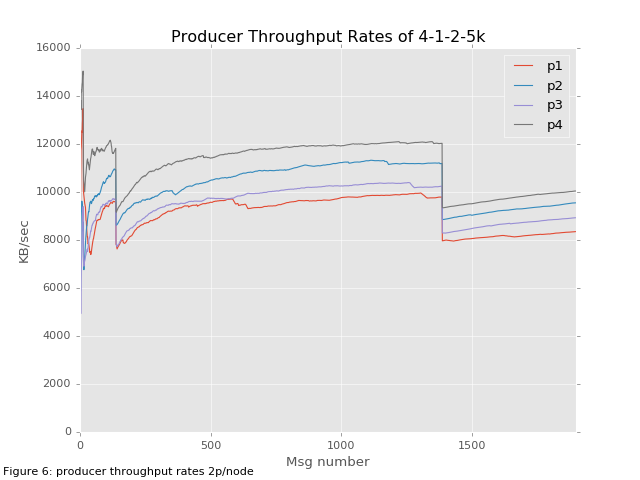

Total Average throughput is: 41543.507 KB/s 
Average Throughput/producer is: 10385.877 KB/s 


In [25]:
f = plt.figure()
plt.plot(p_812_1_5k_20170928_214338[0],p_812_1_5k_20170928_214338[1],label='p1') 
plt.plot(p_812_2_5k_20170928_214338[0],p_812_2_5k_20170928_214338[1],label='p2') 
plt.plot(p_812_3_5k_20170928_214338[0],p_812_3_5k_20170928_214338[1],label='p3') 
plt.plot(p_812_4_5k_20170928_214338[0],p_812_4_5k_20170928_214338[1],label='p4')


plt.xlim(0,1900)
plt.legend()
plt.title('Producer Throughput Rates of 4-1-2-5k')
plt.ylabel('KB/sec')
plt.xlabel('Msg number')

text = 'Figure 6: producer throughput rates 2p/node'
f.text(.20, .01, text, ha='center')


total_producer_throughput_5k_20170928_214338 = sum(p_812_1_5k_20170928_214338[1] +p_812_2_5k_20170928_214338[1] + p_812_3_5k_20170928_214338[1] + p_812_4_5k_20170928_214338[1])

total_producer_throughput_5k_20170928_214338 /= len(p_812_1_5k_20170928_214338[1])

print 'Total Average throughput is: %.3f KB/s ' % total_producer_throughput_5k_20170928_214338
print 'Average Throughput/producer is: %.3f KB/s '  % (total_producer_throughput_5k_20170928_214338/4)

#### Case   5k-4-1-1  on different nodes
Total Average throughput is: 33299.707 KB/s 
Average Throughput/producer is: 8324.927 KB/s

## #2 K-means : 5k-16-1-4 (p-b-c)    - 2 producers / node

In [38]:
sched_delay_5k_16_1_4 = plot_scheduling_and_Total_Delay('5k-16-1-4/spark-metrics-20170929-131334.csv',7)


In [40]:
tpmb_5k_16_1_4 = plot_throughput_per_mini_batch('5k-16-1-4/spark-metrics-20170929-131334.csv',8)

In [35]:
#p_1614_1_5k = plot_producer('5k-16-1-4/producers/node_1/producer_1/','stdout-20170929-131346.csv',1,9,'5k-16-1-4')
#p_1614_2_5k = plot_producer('5k-16-1-4/producers/node_1/producer_2/','stdout-20170929-131349.csv',2,10,'5k-16-1-4')
#p_1614_3_5k = plot_producer('5k-16-1-4/producers/node_1/producer_3/','stdout-20170929-131351.csv',3,11,'5k-16-1-4')
#p_1614_4_5k = plot_producer('5k-16-1-4/producers/node_1/producer_4/','stdout-20170929-131353.csv',4,12,'5k-16-1-4')
#p_1614_5_5k = plot_producer('5k-16-1-4/producers/node_2/producer_1/','stdout-20170929-131356.csv',5,13,'5k-16-1-4')
#p_1614_6_5k = plot_producer('5k-16-1-4/producers/node_2/producer_2/','stdout-20170929-131357.csv',6,14,'5k-16-1-4')
#p_1614_7_5k = plot_producer('5k-16-1-4/producers/node_2/producer_3/','stdout-20170929-131407.csv',7,15,'5k-16-1-4')
#p_1614_8_5k = plot_producer('5k-16-1-4/producers/node_2/producer_4/','stdout-20170929-131409.csv',8,16,'5k-16-1-4')


<IPython.core.display.Javascript object>


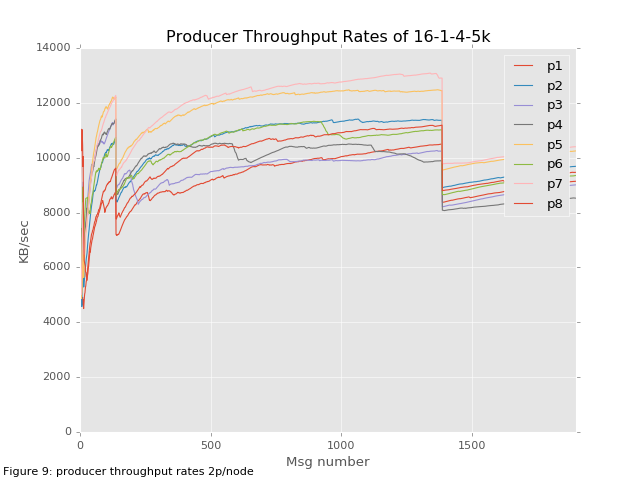

Total Average throughput is: 85125.783 KB/s 
Average Throughput/producer is: 10640.723 KB/s 


In [36]:
f = plt.figure()
plt.plot(p_1614_1_5k[0],p_1614_1_5k[1],label='p1') 
plt.plot(p_1614_2_5k[0],p_1614_2_5k[1],label='p2') 
plt.plot(p_1614_3_5k[0],p_1614_3_5k[1],label='p3') 
plt.plot(p_1614_4_5k[0],p_1614_4_5k[1],label='p4')
plt.plot(p_1614_5_5k[0],p_1614_5_5k[1],label='p5') 
plt.plot(p_1614_6_5k[0],p_1614_6_5k[1],label='p6') 
plt.plot(p_1614_7_5k[0],p_1614_7_5k[1],label='p7') 
plt.plot(p_1614_8_5k[0],p_1614_8_5k[1],label='p8')


plt.xlim(0,1900)
plt.legend()
plt.title('Producer Throughput Rates of 16-1-4-5k')
plt.ylabel('KB/sec')
plt.xlabel('Msg number')

text = 'Figure 9: producer throughput rates 2p/node'
f.text(.20, .01, text, ha='center')


total_producer_throughput_5k_1614 = sum(p_1614_1_5k[1] +p_1614_2_5k[1] + p_1614_3_5k[1] + p_1614_4_5k[1])
total_producer_throughput_5k_1614 += sum(p_1614_5_5k[1] +p_1614_6_5k[1] + p_1614_7_5k[1] + p_1614_8_5k[1])


total_producer_throughput_5k_1614 /= len(p_1614_1_5k[1])

print 'Total Average throughput is: %.3f KB/s ' % total_producer_throughput_5k_1614
print 'Average Throughput/producer is: %.3f KB/s '  % (total_producer_throughput_5k_1614/8)

#### corelation

In [39]:
p = figure(title="Figure " + str(10) + ": Spark Scheduling delay", x_axis_label='miniBatch Number', y_axis_label='Delay in microsec')

p.line(sched_delay_20170912_222705[0], sched_delay_20170912_222705[1], legend="8-1-2", line_width=2,line_color="red")
p.line(sched_delay_5k_16_1_4[0], sched_delay_5k_16_1_4[1], legend="16-1-4", line_width=2,line_color="blue")



bplt.show(p)

In [41]:
p = figure(title="Figure " + str(11) + ": Spark throughput", x_axis_label='miniBatch Number', y_axis_label='Delay in microsec')

p.line(tpmb_20170912_222705[0], tpmb_20170912_222705[1], legend="8-1-2", line_width=2,line_color="red")
p.line(tpmb_5k_16_1_4[0], tpmb_5k_16_1_4[1], legend="16-1-4", line_width=2,line_color="blue")

bplt.show(p)